In [1]:
import mne
import numpy as np
import scipy
import os
from scipy import signal as sg
from matplotlib import pyplot as plt

In [2]:
directory_path = "D:/EEG RESEARCH DATA"
os.chdir(directory_path)

In [3]:
fpath = 'epoch_data'

epoch_stress = []
for i in os.listdir(fpath):
    if i.endswith('-epoch_stress-epo.fif'):
        epoch_stress.append(os.path.join(fpath,i))

epoch_first_rest = []
for i in os.listdir(fpath):
    if i.endswith('-epoch_first_rest-epo.fif'):
        epoch_first_rest.append(os.path.join(fpath,i))

In [4]:
epoch_stress

['epoch_data\\20231019_B68_stroopv1_0001-epoch_stress-epo.fif',
 'epoch_data\\20240129_mat5mins_001-epoch_stress-epo.fif',
 'epoch_data\\20240418_B98_jikken_0001-epoch_stress-epo.fif',
 'epoch_data\\20240418_B98_jikken_0002-epoch_stress-epo.fif',
 'epoch_data\\20240418_B98_jikken_0003-epoch_stress-epo.fif',
 'epoch_data\\20240418_B98_jikken_0004-epoch_stress-epo.fif']

In [5]:
# ch_drop = ['P4', 'P6']

epochs_stress_list =[]
for file in epoch_stress:
    epoch = mne.read_epochs(file)
    # if ch_drop in epoch.ch_names:
    #     epoch = epoch.drop_channels(['P4', 'P6'])
    epochs_stress_list.append(epoch)

epochs_first_rest_list =[]
for file in epoch_first_rest:
    epoch = mne.read_epochs(file)
    # if ch_drop in epoch.ch_names:
    #     epoch = epoch.drop_channels(['P4', 'P6'])
    epochs_first_rest_list.append(epoch)

Reading D:\EEG RESEARCH DATA\epoch_data\20231019_B68_stroopv1_0001-epoch_stress-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
323 matching events found
No baseline correction applied
0 projection items activated
Reading D:\EEG RESEARCH DATA\epoch_data\20240129_mat5mins_001-epoch_stress-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
319 matching events found
No baseline correction applied
0 projection items activated
Reading D:\EEG RESEARCH DATA\epoch_data\20240418_B98_jikken_0001-epoch_stress-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     600.00 ms
        0 CTF compensation matrices available
Not setting metadata
270 matching events found
No baseline correction applied
0 projection items activated
Reading D:\EEG RESEARCH DATA\epoch_data\20240418_B98_

In [11]:
evoked_stress = []
for i in epochs_stress_list:
    evoked_stress.append(i.average())

evoked_first_rest = []
for i in epochs_first_rest_list:
    evoked_first_rest.append(i.average())

Identifying common channels ...
Identifying common channels ...


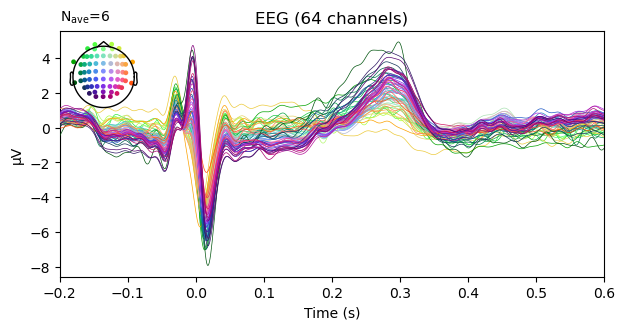

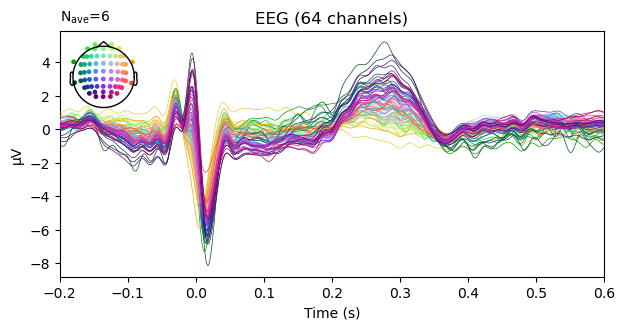

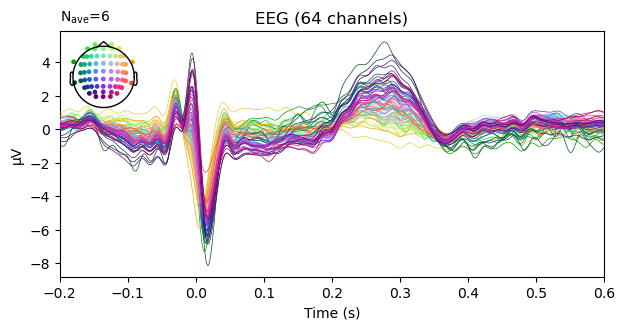

In [12]:
stress_grand_average = mne.grand_average(evoked_stress)
rest_grand_average = mne.grand_average(evoked_first_rest)

stress_grand_average.plot()
rest_grand_average.plot()

In [7]:
concatenate_stress = mne.concatenate_epochs(epochs_stress_list)
concatenate_rest = mne.concatenate_epochs(epochs_first_rest_list)

C:\Users\Jeremi\AppData\Local\Temp\ipykernel_7884\1413174694.py:1: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  concatenate_stress = mne.concatenate_epochs(epochs_stress_list)


Not setting metadata
1408 matching events found
Applying baseline correction (mode: mean)
Not setting metadata


C:\Users\Jeremi\AppData\Local\Temp\ipykernel_7884\1413174694.py:2: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  concatenate_rest = mne.concatenate_epochs(epochs_first_rest_list)


1349 matching events found
Applying baseline correction (mode: mean)


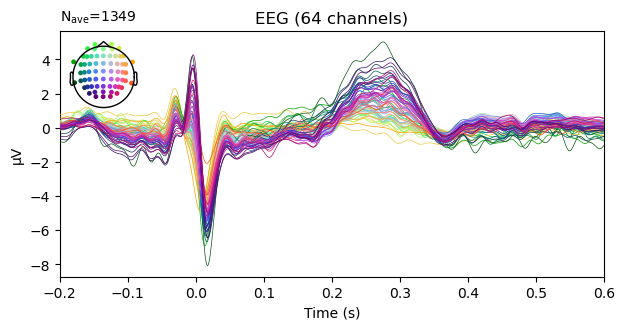

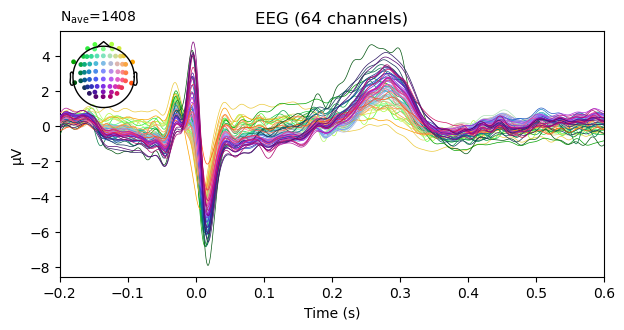

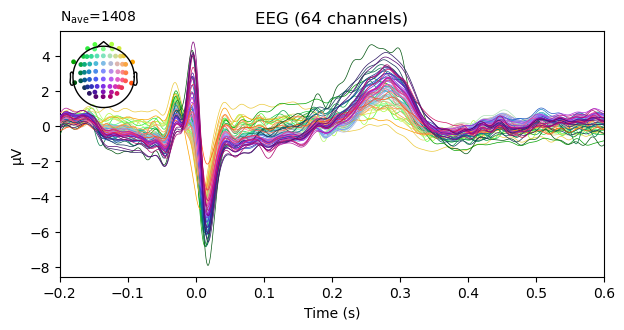

In [13]:
evoked_first_rest1 = concatenate_rest.average()
evoked_stress1 = concatenate_stress.average()

evoked_first_rest1.plot()
evoked_stress1.plot()

In [9]:
concatenate_rest_data = concatenate_rest.get_data()
concatenate_stress_data = concatenate_stress.get_data()

In [14]:
from scipy.stats import ttest_ind

t_test_ga = ttest_ind(concatenate_rest_data,concatenate_stress_data)

In [16]:
stress_grand_average_data = stress_grand_average.get_data()
rest_grand_average_data = rest_grand_average.get_data()


In [19]:
np.shape(t_test_ga.pvalue)

(64, 801)

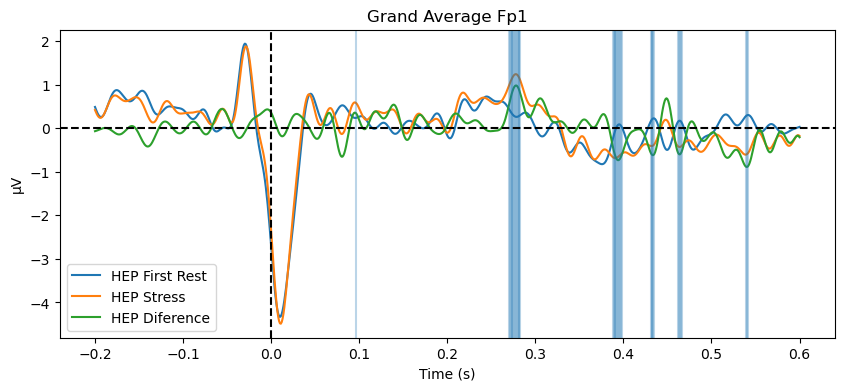

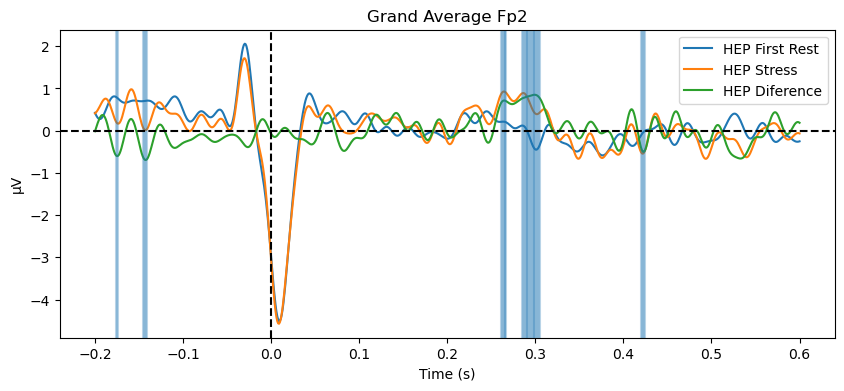

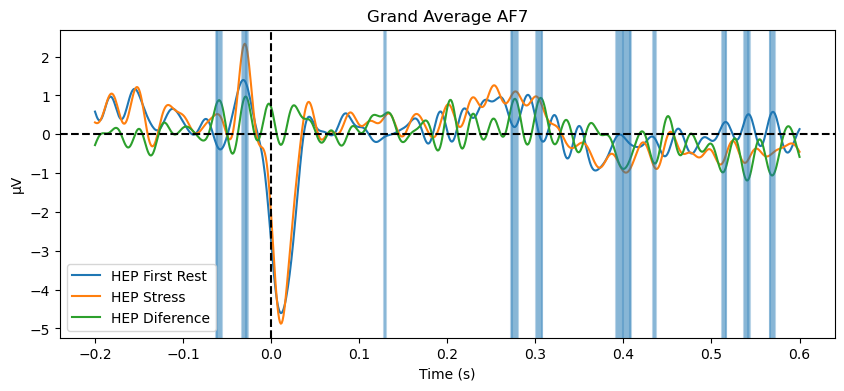

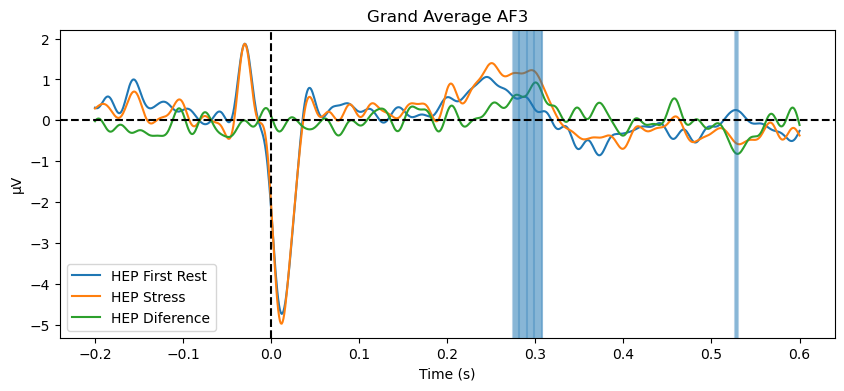

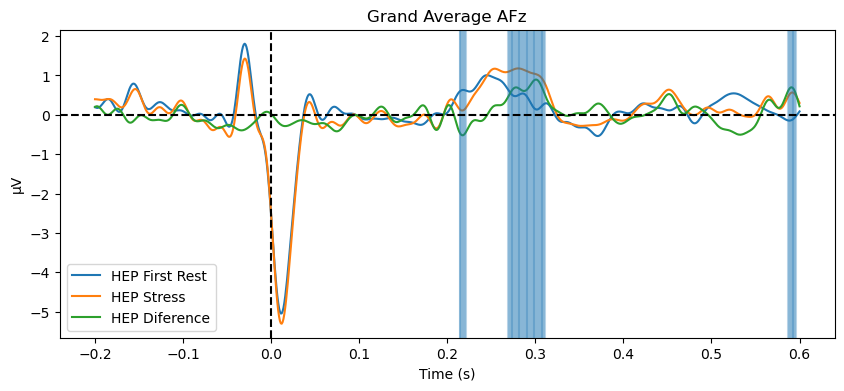

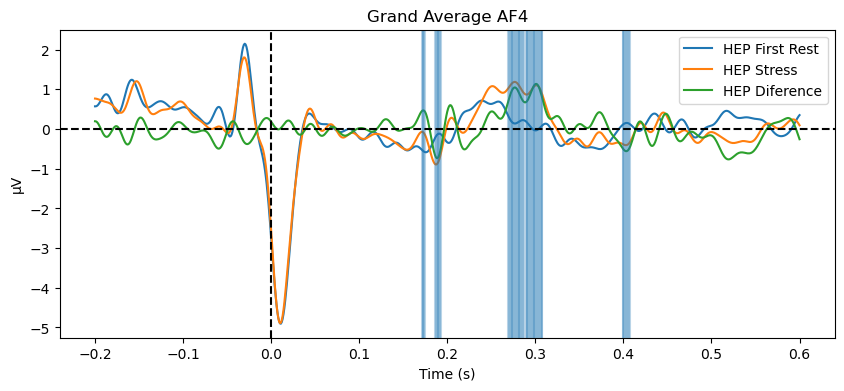

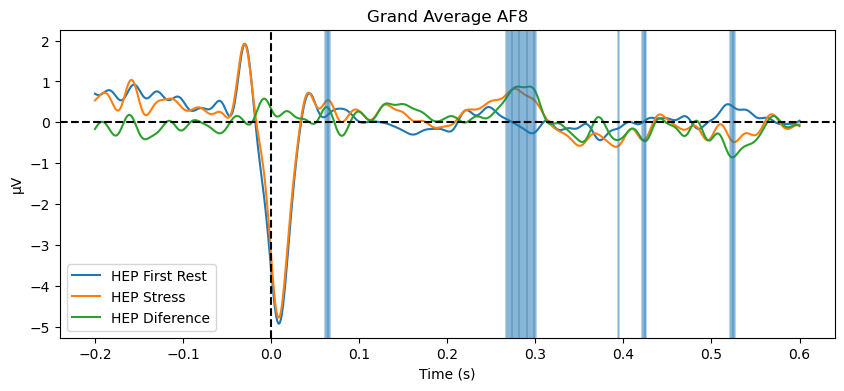

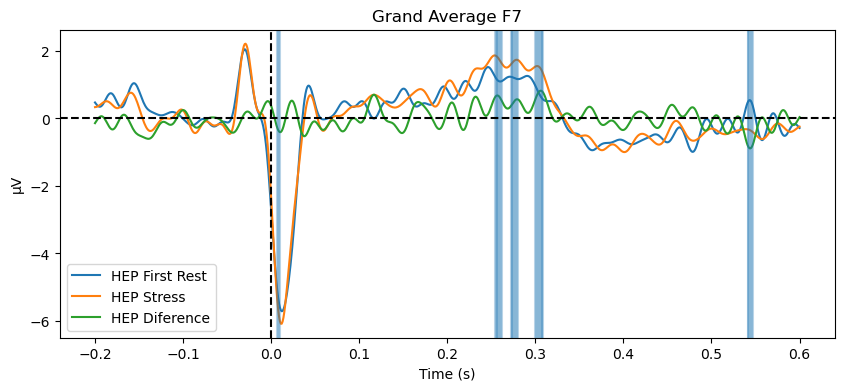

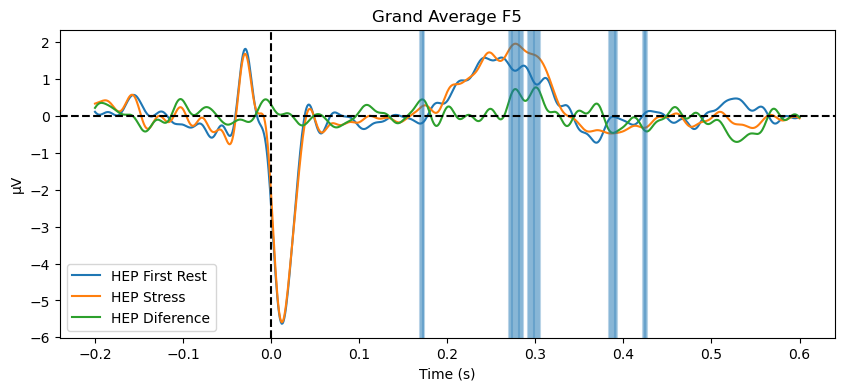

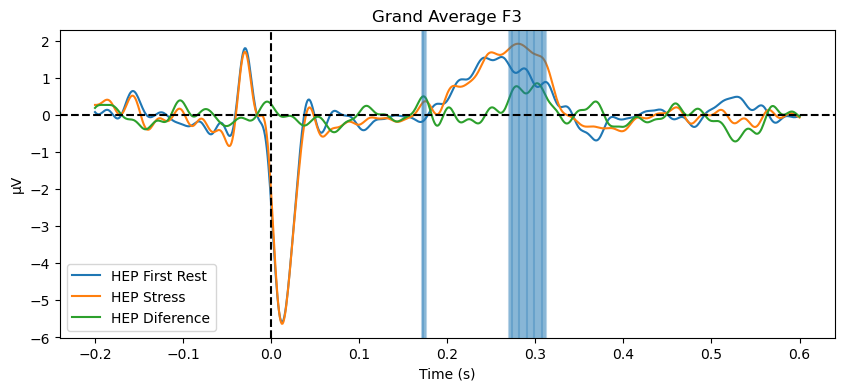

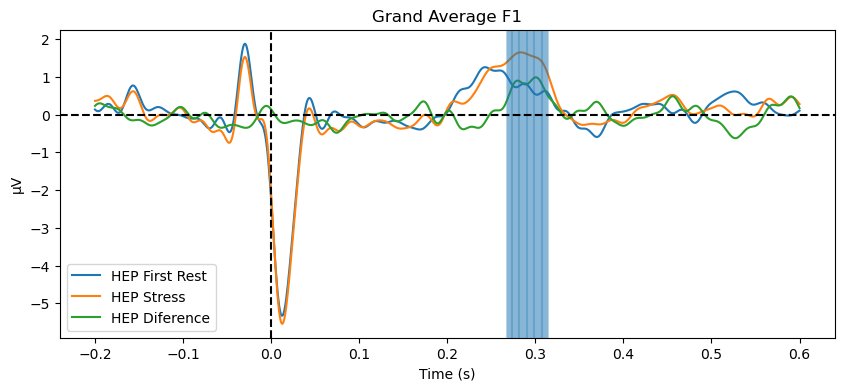

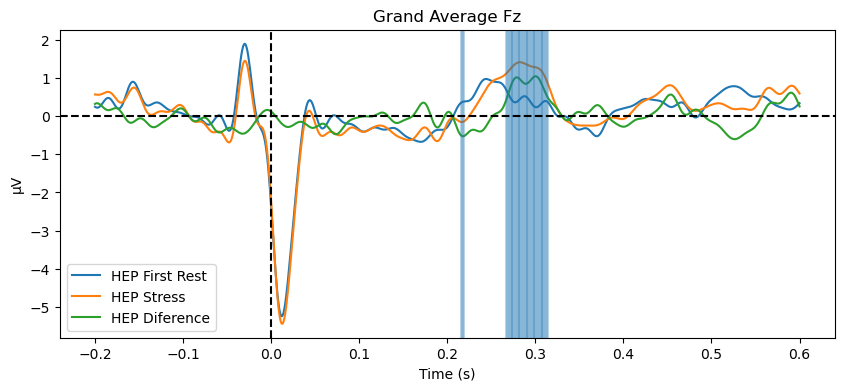

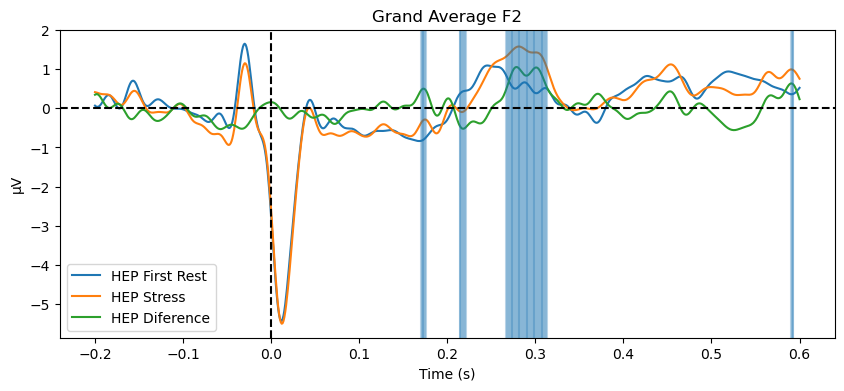

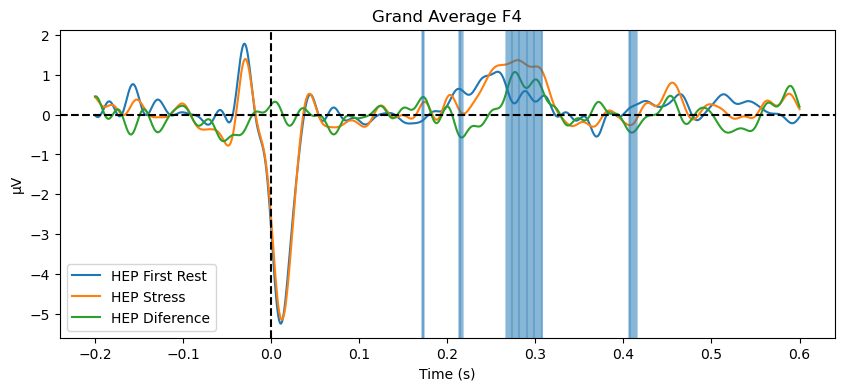

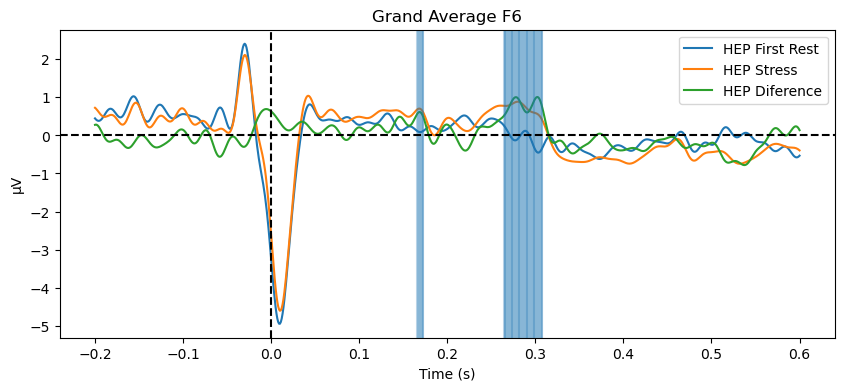

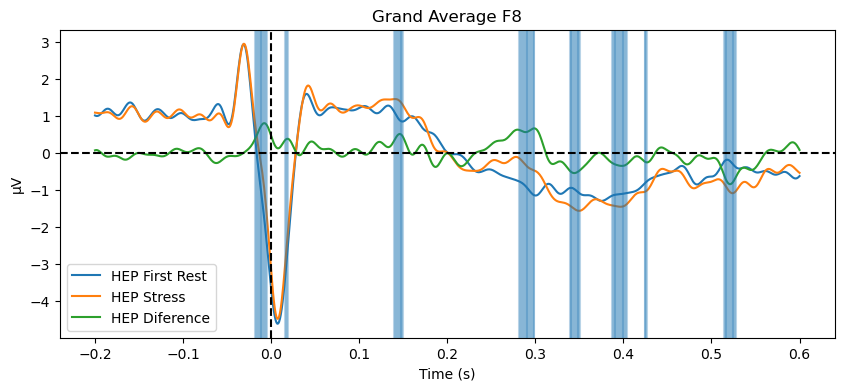

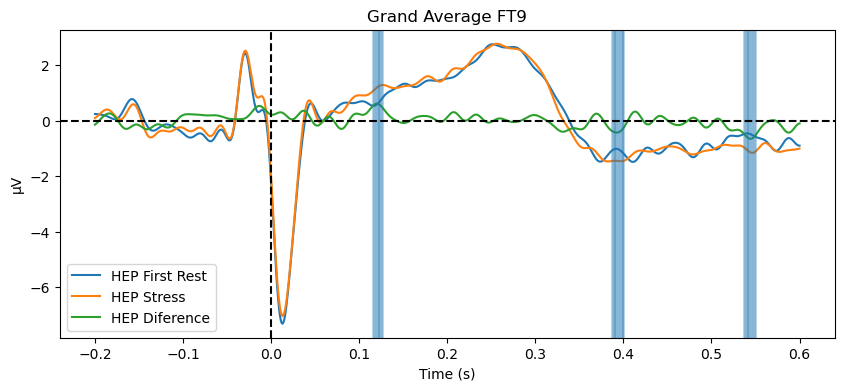

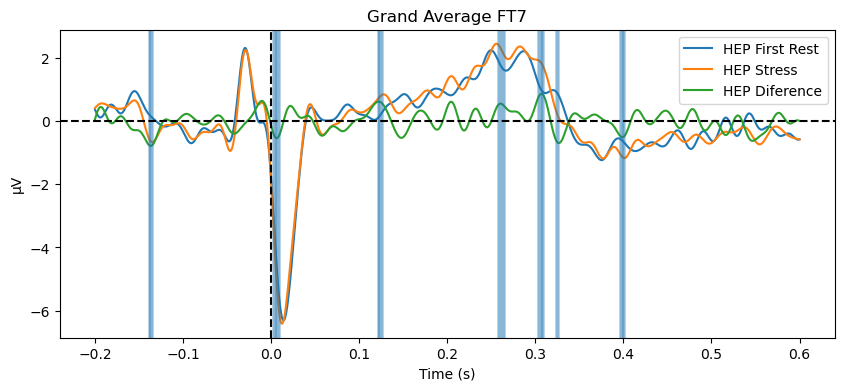

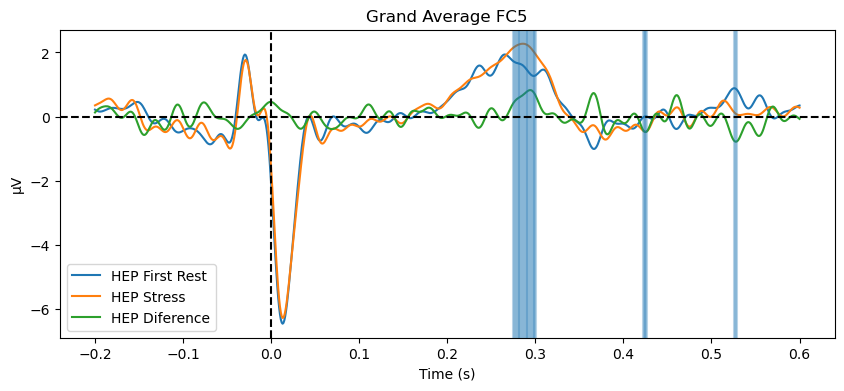

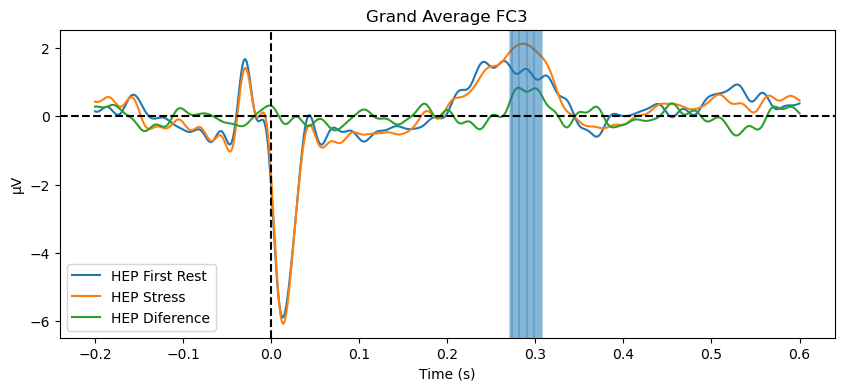

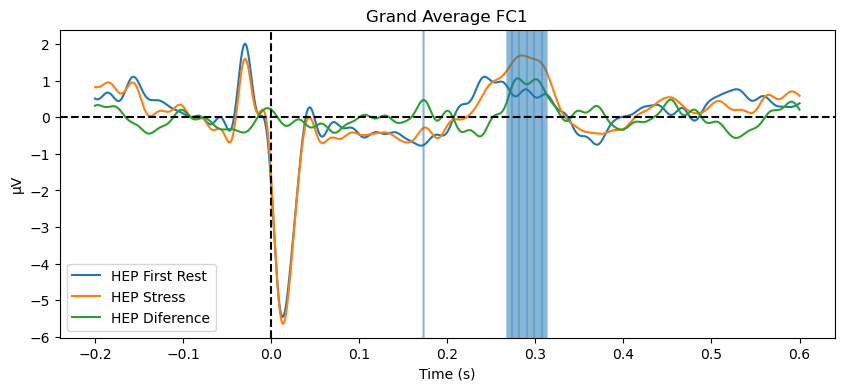

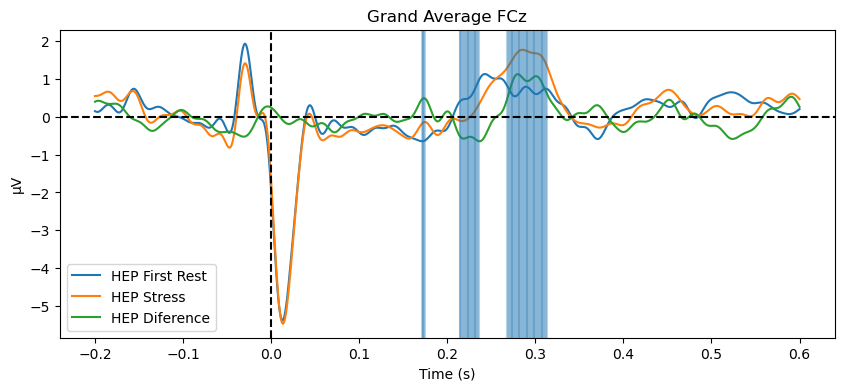

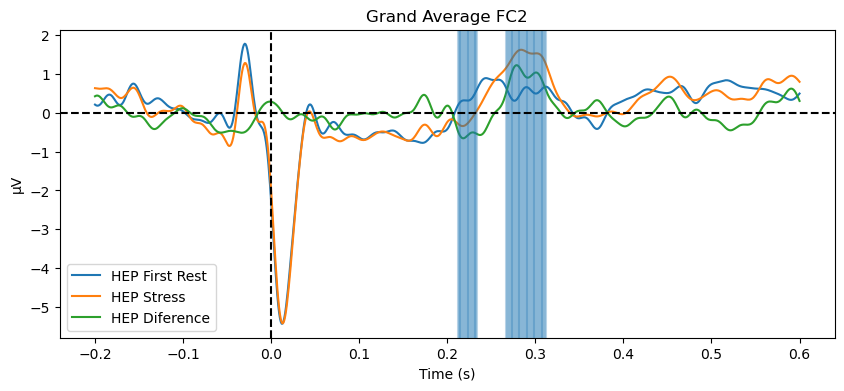

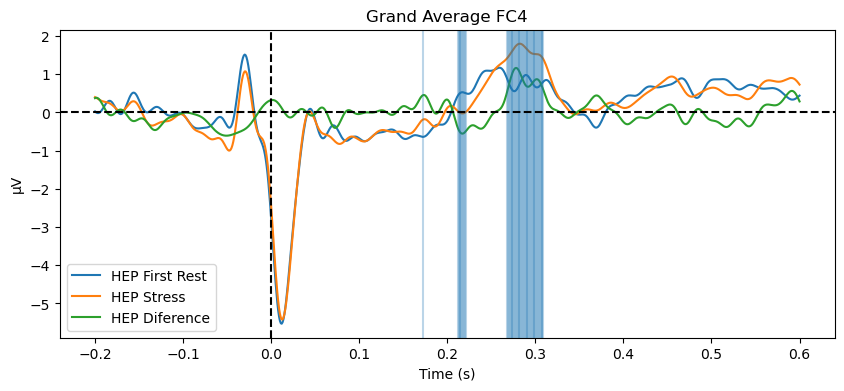

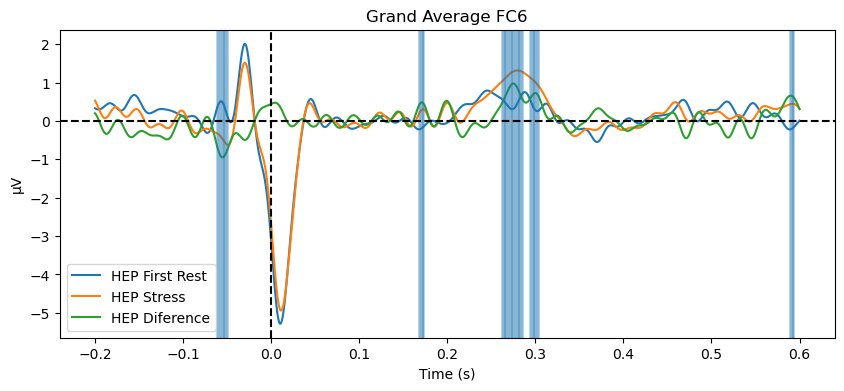

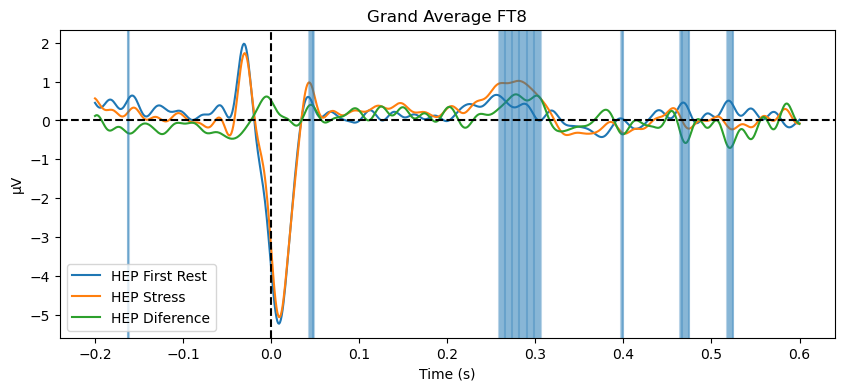

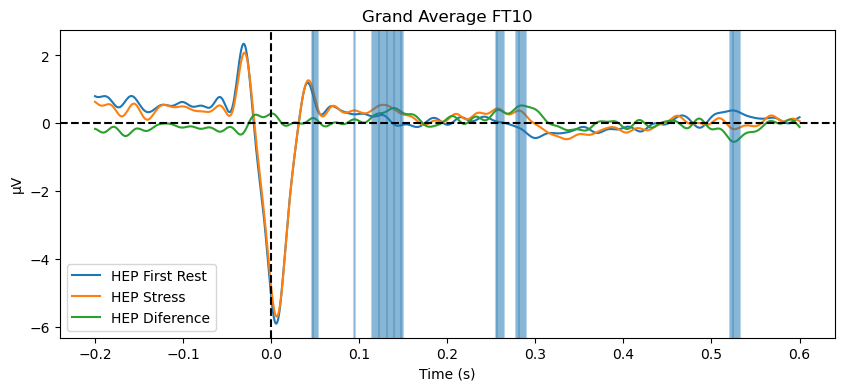

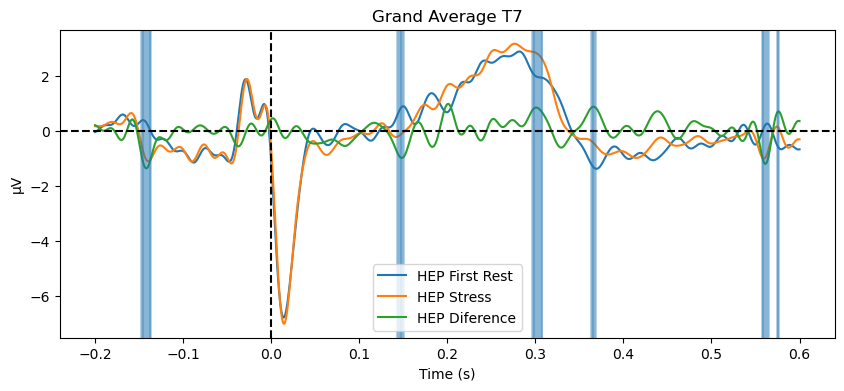

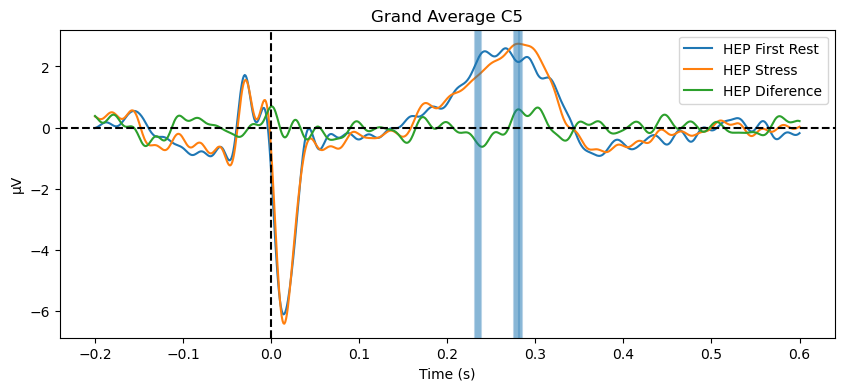

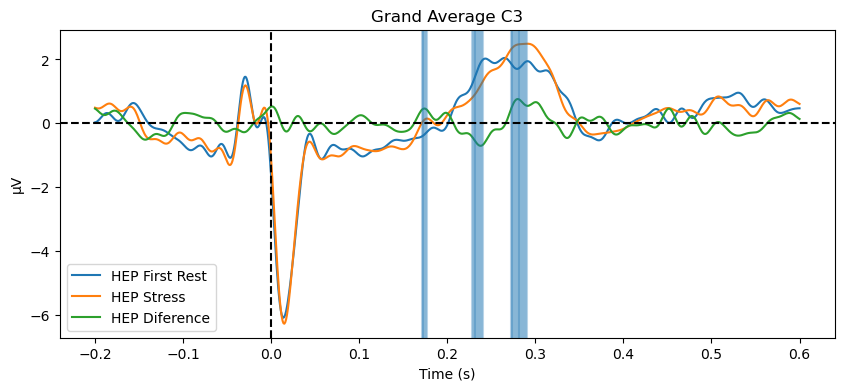

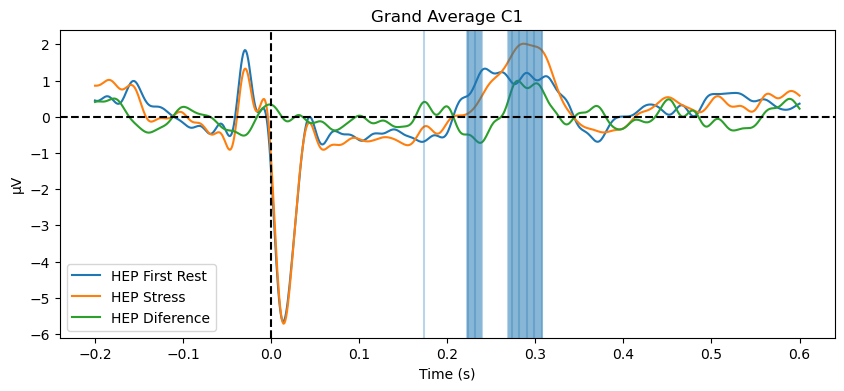

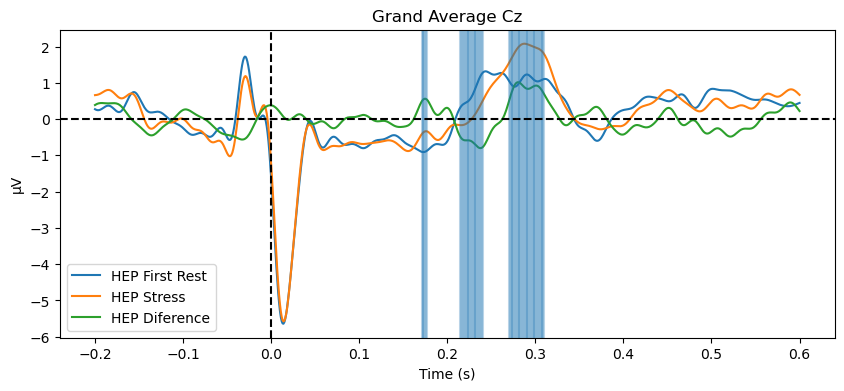

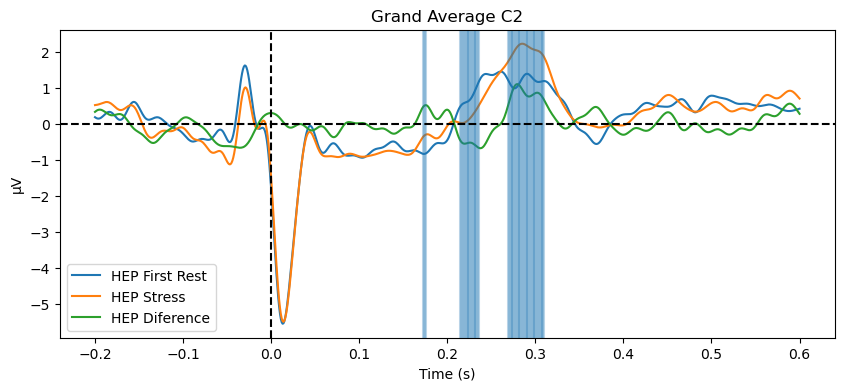

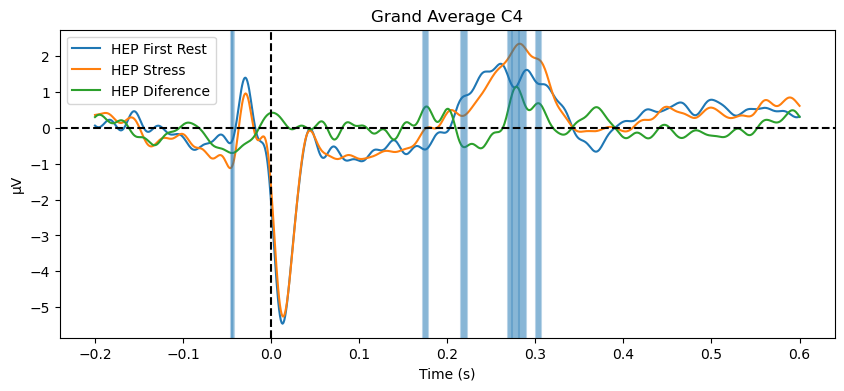

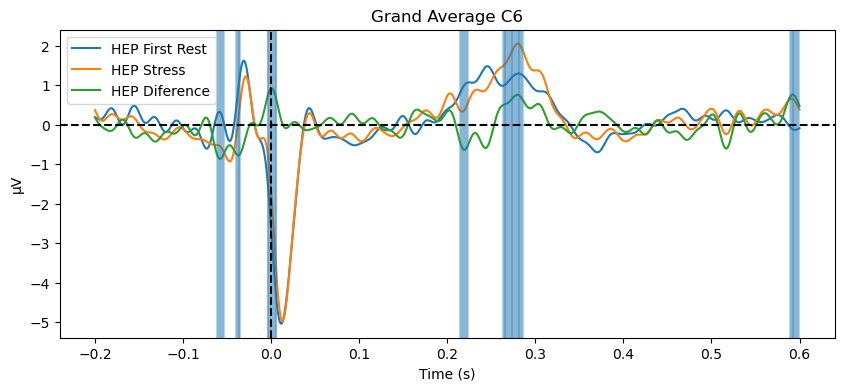

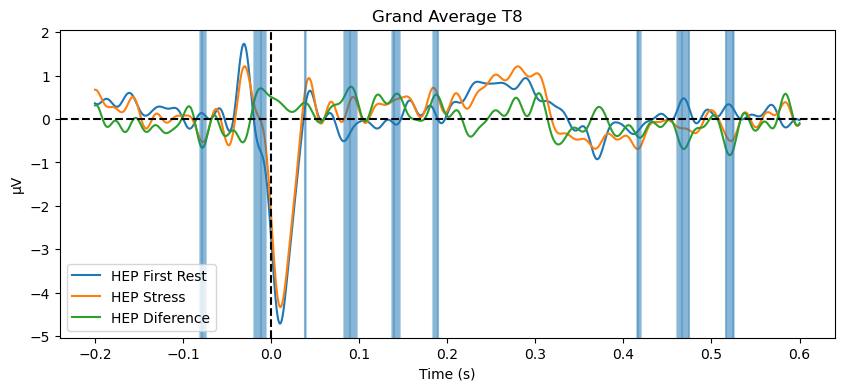

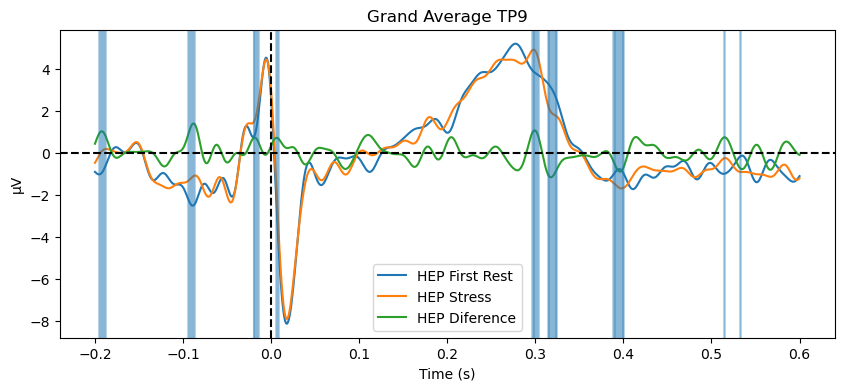

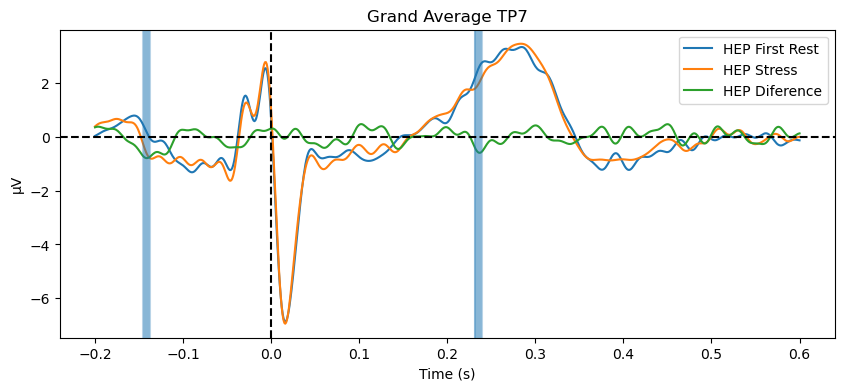

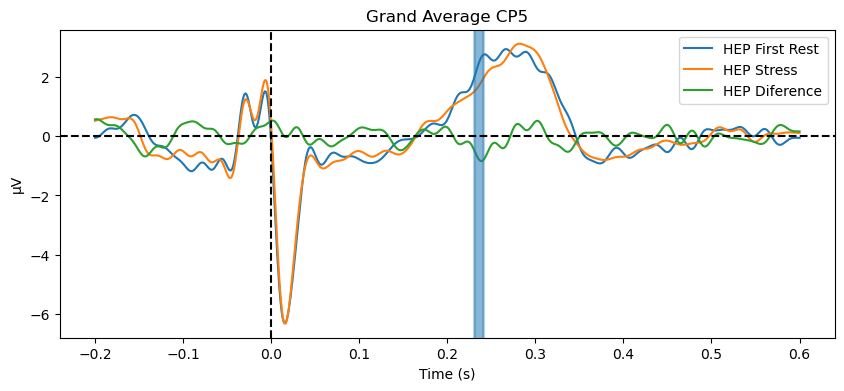

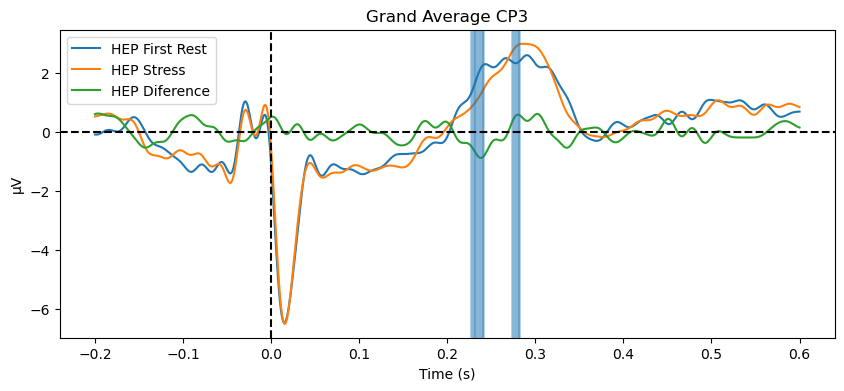

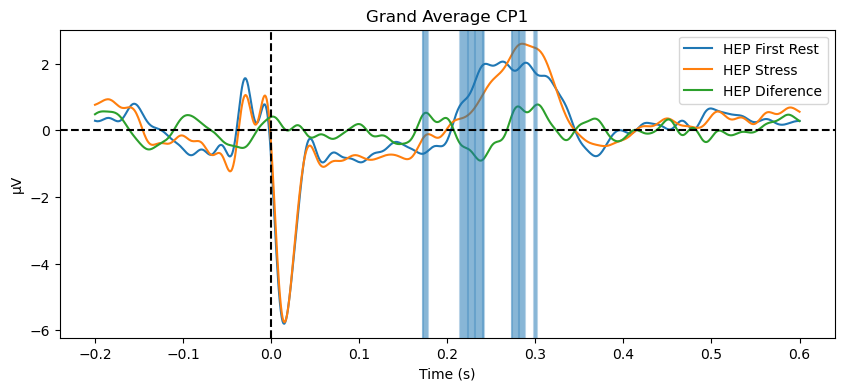

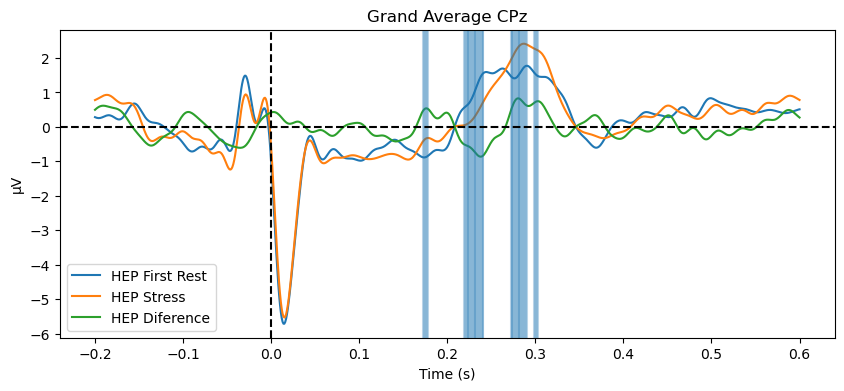

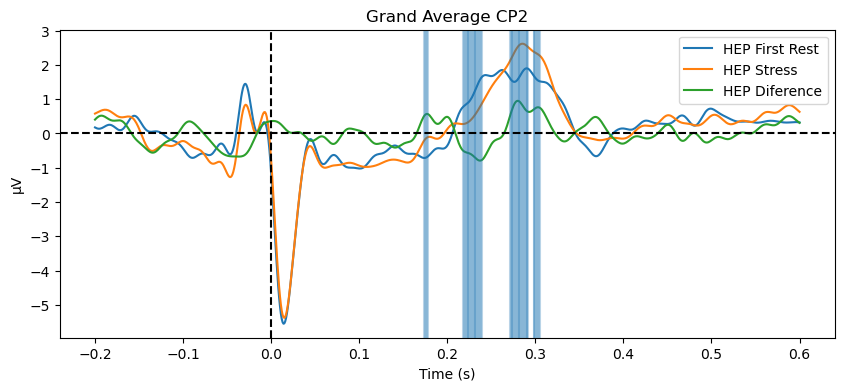

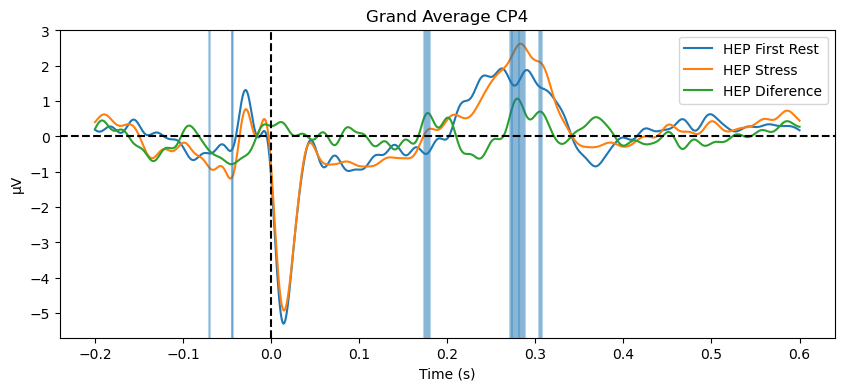

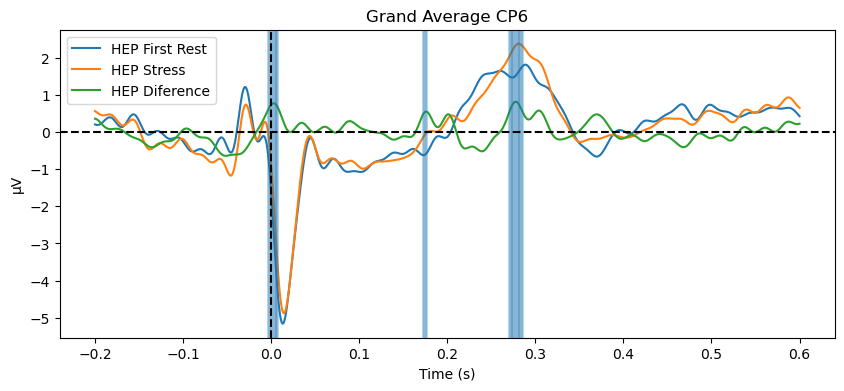

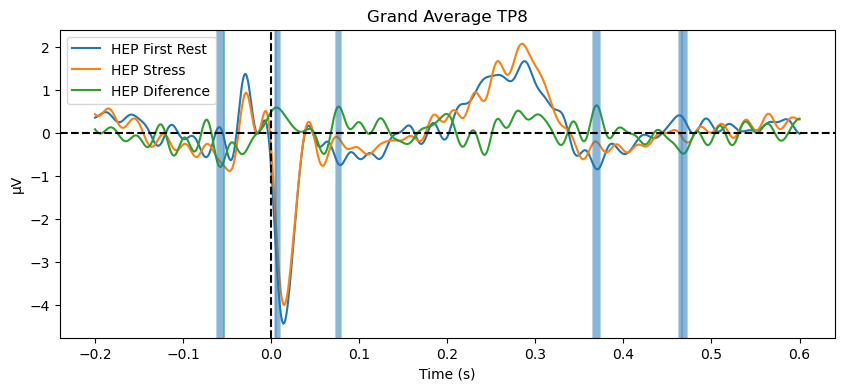

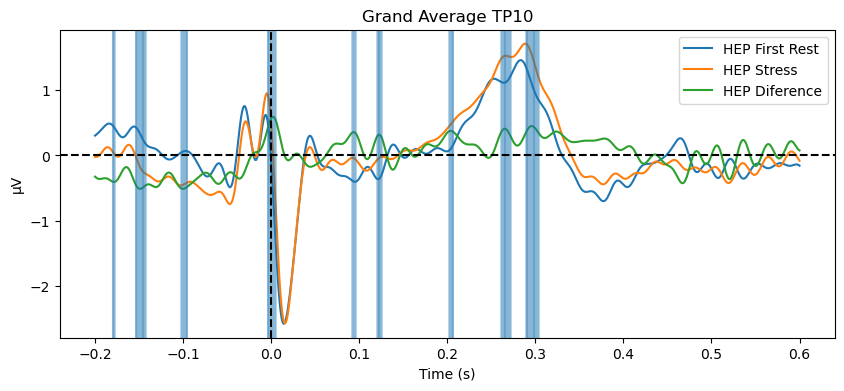

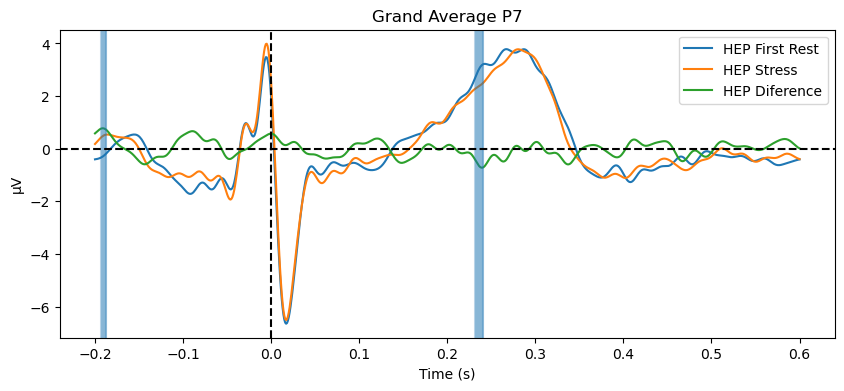

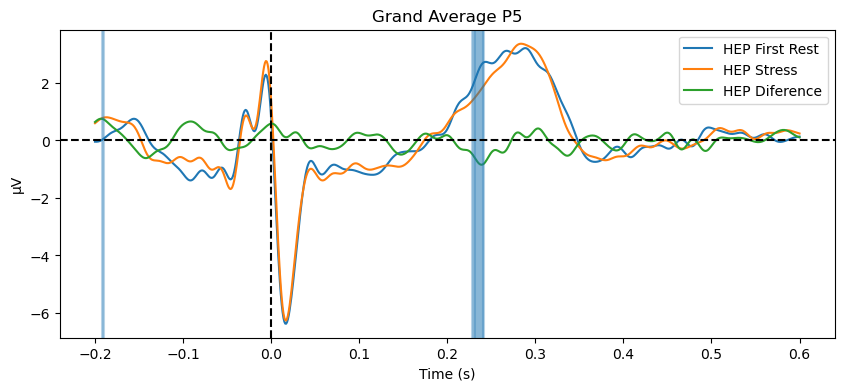

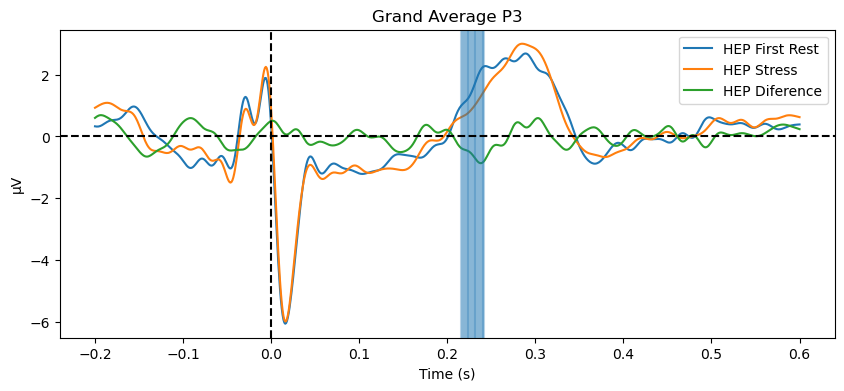

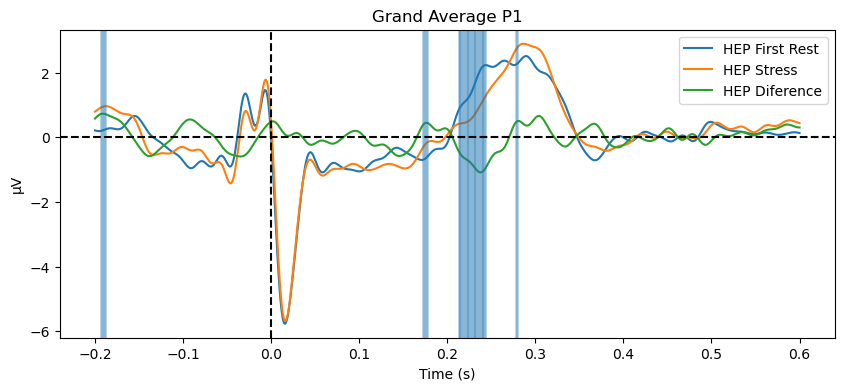

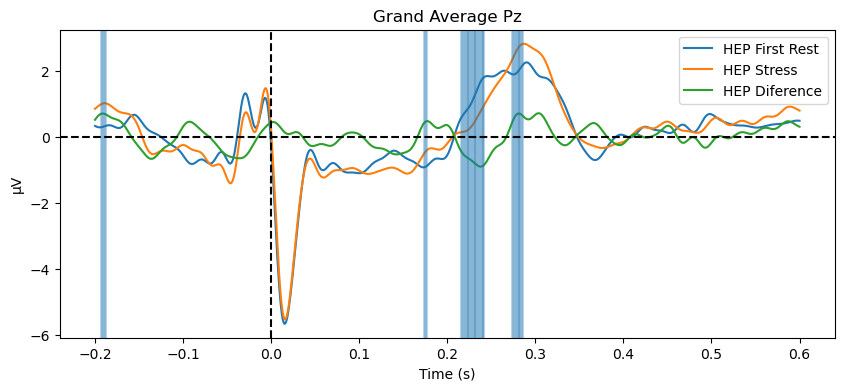

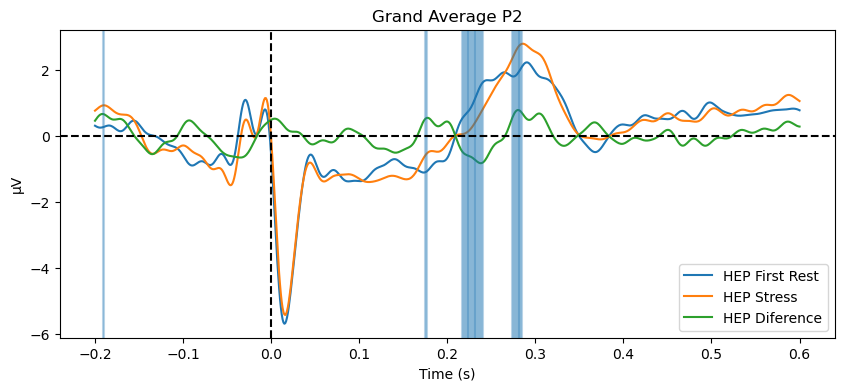

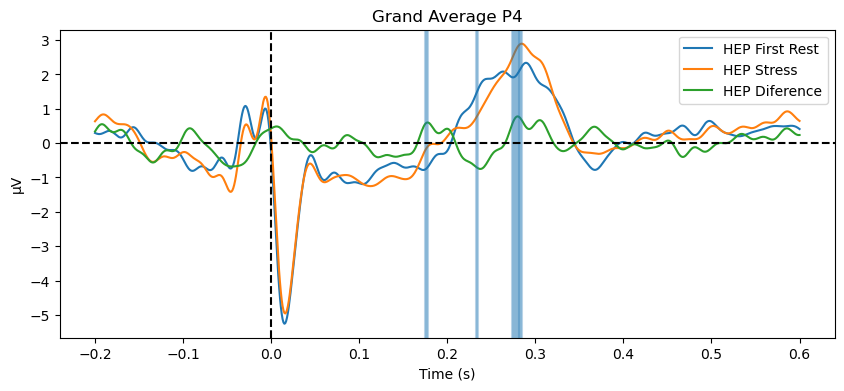

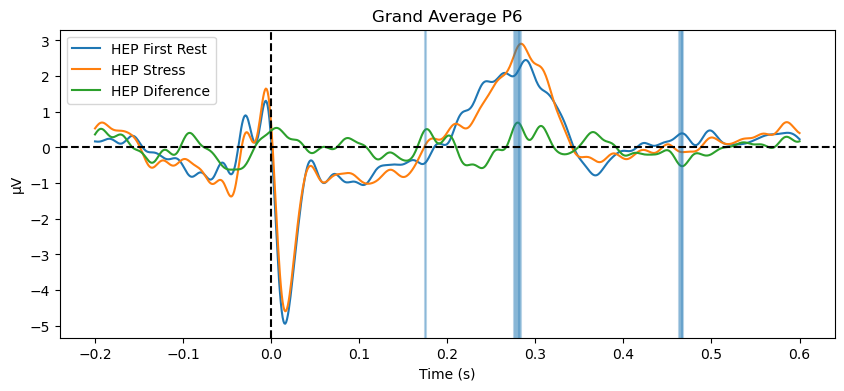

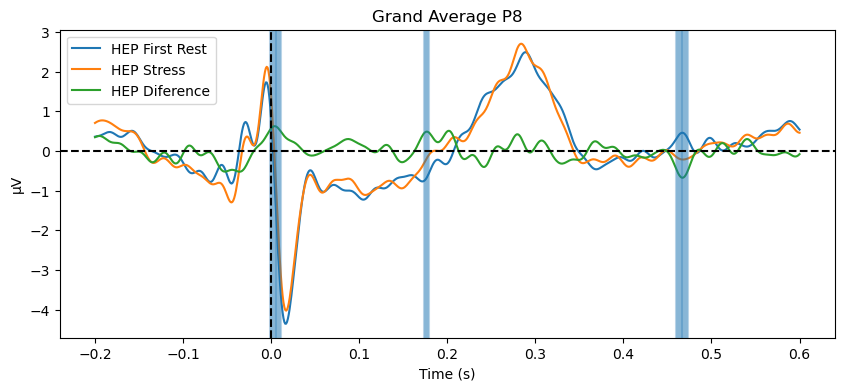

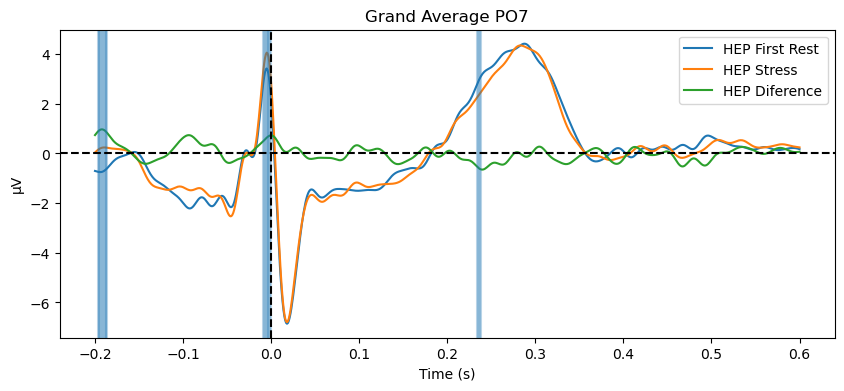

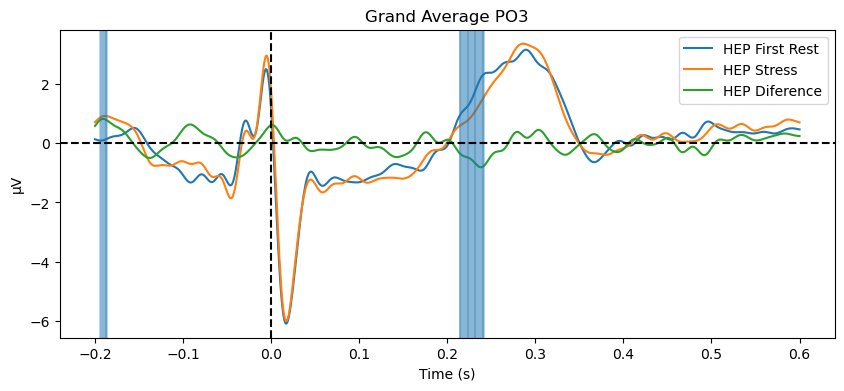

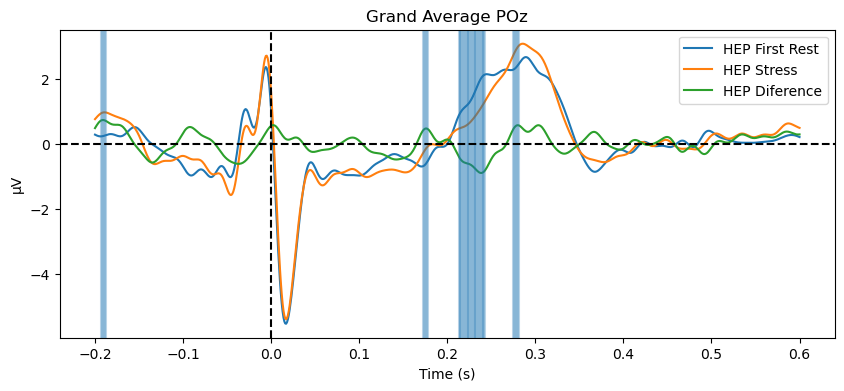

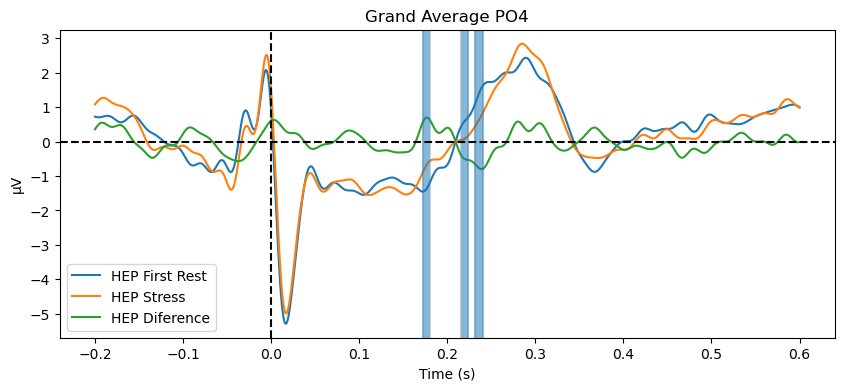

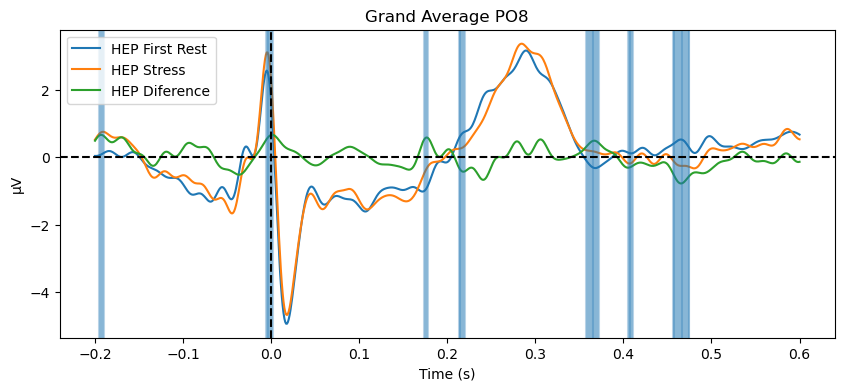

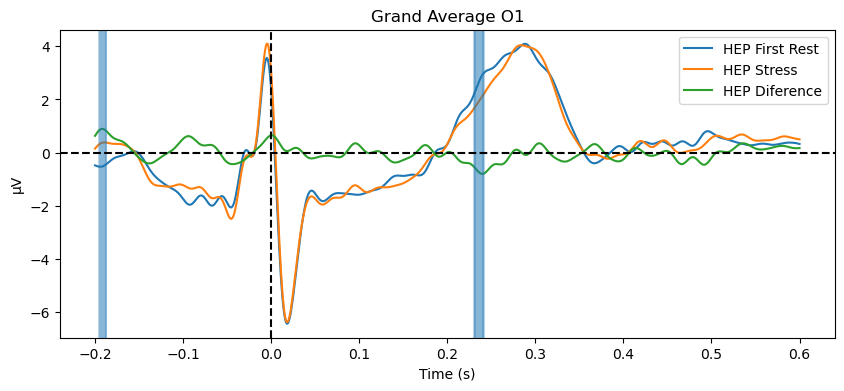

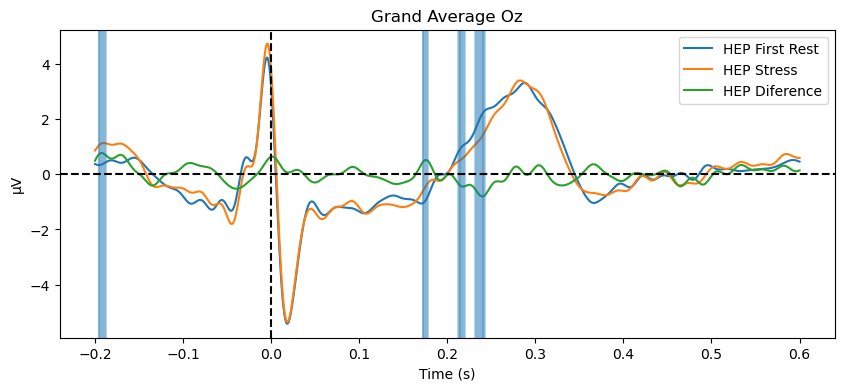

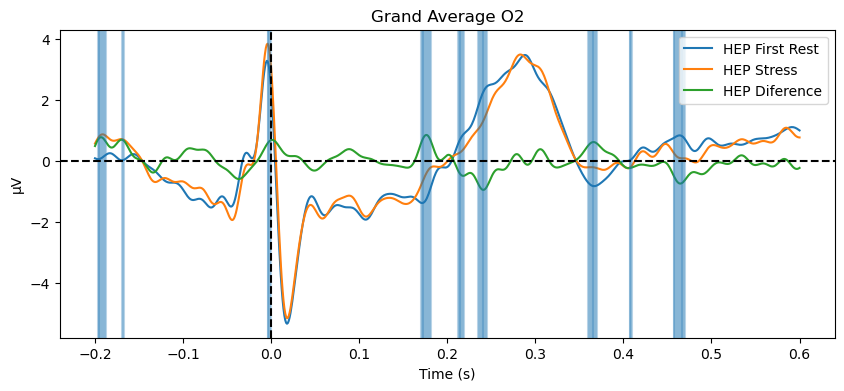

In [21]:
ch_name = stress_grand_average.ch_names
diff = stress_grand_average_data - rest_grand_average_data
step = 1/1000
epoch_tmin = -0.2
epoch_tmax = 0.6
time = np.arange(epoch_tmin, epoch_tmax+step, step)

for j in range(len(ch_name)):
    a = ch_name[j]

    plt.figure(figsize= (10,4))
    plt.plot(time,rest_grand_average_data[j] * 1e6, label = 'HEP First Rest')
    plt.plot(time,stress_grand_average_data[j]* 1e6, label = 'HEP Stress')
    plt.plot(time,diff[j]* 1e6, label = 'HEP Diference')
    for i in range(len(t_test_ga.pvalue[j])):
        if t_test_ga.pvalue[j][i] <= 0.05:
            plt.axvline(x = (i*step)+epoch_tmin, ymin = 0 , ymax = 1, alpha = 0.3)
    plt.axvline(0, linestyle = '--', c = 'black')
    plt.axhline(0, linestyle = '--', c = 'black')
    plt.ylabel('μV')
    plt.xlabel('Time (s)')
    plt.legend()
    plt.title('Grand Average '+ a)
    plt.show()

In [46]:
index = np.where(t_test_ga.pvalue[ch_name.index('FCz')] <= 0.05) 
index = np.array(index)
for i in range(len(index)):
    index[i] -= 200
print(index)

time_stamp = index*step
print(time_stamp)

print(t_test_ga.pvalue[ch_name.index('FCz')][np.where(t_test_ga.pvalue[ch_name.index('FCz')] <= 0.05)])

[[171 172 173 174 175 214 215 216 217 218 219 220 221 222 223 224 225 226
  227 228 229 230 231 232 233 234 235 236 268 269 270 271 272 273 274 275
  276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
  294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
  312 313]]
[[0.171 0.172 0.173 0.174 0.175 0.214 0.215 0.216 0.217 0.218 0.219 0.22
  0.221 0.222 0.223 0.224 0.225 0.226 0.227 0.228 0.229 0.23  0.231 0.232
  0.233 0.234 0.235 0.236 0.268 0.269 0.27  0.271 0.272 0.273 0.274 0.275
  0.276 0.277 0.278 0.279 0.28  0.281 0.282 0.283 0.284 0.285 0.286 0.287
  0.288 0.289 0.29  0.291 0.292 0.293 0.294 0.295 0.296 0.297 0.298 0.299
  0.3   0.301 0.302 0.303 0.304 0.305 0.306 0.307 0.308 0.309 0.31  0.311
  0.312 0.313]]
[4.85295659e-02 3.97184710e-02 3.58168637e-02 3.61159274e-02
 4.09314760e-02 4.74076472e-02 4.23984203e-02 3.96342979e-02
 3.85762722e-02 3.88094880e-02 3.99756605e-02 4.17204337e-02
 4.36681622e-02 4.54296853e-02 4.66438416e-02 4.70

In [49]:
print(t_test_ga.pvalue[ch_name.index('FCz')][468:513])

[3.22410910e-02 1.70621279e-02 8.50234870e-03 4.06810902e-03
 1.91832877e-03 9.19534298e-04 4.62975777e-04 2.52537807e-04
 1.53079118e-04 1.04881193e-04 8.18056237e-05 7.24742455e-05
 7.21842860e-05 7.95325796e-05 9.50213251e-05 1.20423892e-04
 1.58307974e-04 2.11281755e-04 2.80713163e-04 3.65004368e-04
 4.57956502e-04 5.48585471e-04 6.23359677e-04 6.70265255e-04
 6.82938449e-04 6.62901005e-04 6.18601306e-04 5.61883712e-04
 5.04259244e-04 4.54764256e-04 4.19602792e-04 4.03077076e-04
 4.09476436e-04 4.45395229e-04 5.22688956e-04 6.63027129e-04
 9.05455407e-04 1.31909907e-03 2.02294104e-03 3.21278381e-03
 5.19040877e-03 8.38254174e-03 1.33288457e-02 2.06181986e-02
 3.07712941e-02]
